# PME3481 - Controle e Aplicações

## ITAE

### Preparação do Ambiente

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import control as ctl

### Aplicação do ITAE

Função para cálculo de minimização de custo ITAE

In [8]:
def itae_cost(params, G):
    # PID parameters
    Kp, Ki, Kd = params
    
    # Define the PID controller transfer function
    pid = ctl.TransferFunction([Kd, Kp, Ki], [1, 0])
    
    # Closed-loop transfer function
    system = ctl.feedback(pid * G, 1)
    
    # Time vector for simulation
    T = np.linspace(0, 10, 1000)
    
    # Step response of the closed-loop system
    T, yout = ctl.step_response(system, T)
    
    # ITAE calculation
    itae = np.sum(T * np.abs(1 - yout))
    
    return itae

Obtendo as respostas

Optimal PID parameters: Kp = 523074143825108.25, Ki = -1005866389878762.0, Kd = 5006198420691070.0


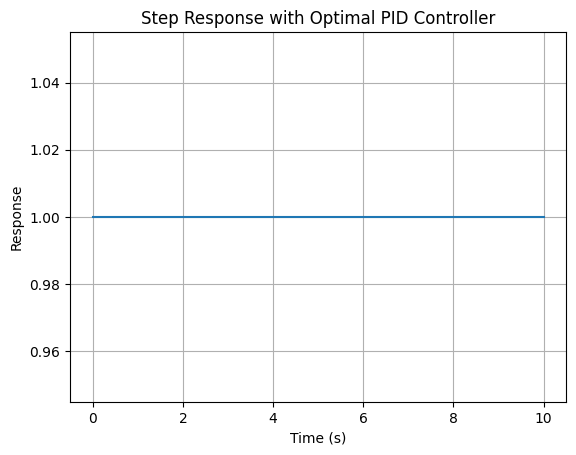

In [9]:
# Define the plant transfer function (example: second-order system)
num = [-9.793, -4.896, 157.7, 78.84]  # Numerador
den = [1, 4, 5.25, 2.75, 0.5]  # Denominador
G = ctl.TransferFunction(num, den)

# Initial guess for PID parameters
initial_guess = [2.5, 0.7, 2.5]

# Perform optimization to minimize the ITAE
result = minimize(itae_cost, initial_guess, args=(G,), method='Nelder-Mead')

# Optimal PID parameters
Kp_opt, Ki_opt, Kd_opt = result.x

print(f'Optimal PID parameters: Kp = {Kp_opt}, Ki = {Ki_opt}, Kd = {Kd_opt}')

# Plot the step response with optimal PID parameters
pid_opt = ctl.TransferFunction([Kd_opt, Kp_opt, Ki_opt], [1, 0])
system_opt = ctl.feedback(pid_opt * G, 1)
T = np.linspace(0, 10, 1000)
T, yout_opt = ctl.step_response(system_opt, T)

plt.figure()
plt.plot(T, yout_opt)
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Step Response with Optimal PID Controller')
plt.grid(True)
plt.show()